# Table of Contents

  [Gathering the Data](#gd)<br>
  [Data Assessment](#da)<br>
  [End Gathering Data](#egd)<br>
  [Notes on Assessment](#noa)<br>
  [Data Quality Issues](#dqa)<br>
  [Tidiness Issues](#ti)<br>
  [Create Copies of Datasets](#copies)<br>
  [DF1 Cleaning](#df1clean)<br>
  [DF2 Cleaning](#df2clean)<br>
  [DF3 Cleaning](#df3clean)<br>
  [DF4 Merged Data Cleaning](#df4clean)<br>
  [Save file to csv](#store)<br>
  [Visualisations](#viz)<br>

## Gathering the Data

<a id='gd'></a>

In [1]:

import pandas as pd
df_1 = pd.read_csv('twitter-archive-enhanced.csv')
import json

In [3]:
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import pandas as pd


# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = '####'
consumer_secret = '####'
access_token = '####'
access_secret = '####'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


tweet_ids = df_1.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)


1: 892420643555336193
Success
2: 892177421306343426
Fail
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 886054160059072513


In [2]:
df_3 = pd.DataFrame(columns=['tweet_id', 'retweet_count', 'favorite_count'])
with open('tweet_json.txt') as f:
    for line in f:
        status = json.loads(line)
        tweet_id = status['id_str']
        retweet_count = status['retweet_count']
        favorite_count = status['favorite_count']
        df_3 = df_3.append(pd.DataFrame([[tweet_id, retweet_count, favorite_count]],
                                       columns=['tweet_id', 'retweet_count', 'favorite_count']))
df_3 = df_3.reset_index(drop=True)
df_3
        

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7246,34687
1,892177421306343426,5429,30054
2,891815181378084864,3583,22622
3,891689557279858688,7448,37937
4,891327558926688256,8007,36218
...,...,...,...
2326,666049248165822465,37,92
2327,666044226329800704,119,254
2328,666033412701032449,38,105
2329,666029285002620928,41,117


In [3]:
import requests
import os

In [4]:
os.getcwd()

'C:\\Users\\user-pc\\Dropbox\\My PC (DESKTOP-2QM7653)\\Documents\\Data_Analyst_Wrangle_Project'

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('C:\\Users\\user-pc\\Dropbox\\My PC (DESKTOP-2QM7653)\\Documents\\Data_Analyst_Wrangle_Project\\image-predictions.tsv', mode='wb') as f:
    f.write(response.content)

        

In [6]:
df_2 = pd.read_table('image-predictions.tsv')


## Assessing the Data
<a id="da"></a>


In [7]:
df_1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
df_1.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [9]:
df_2.head()


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [10]:
df_2.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [11]:
df_3.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7246,34687
1,892177421306343426,5429,30054
2,891815181378084864,3583,22622
3,891689557279858688,7448,37937
4,891327558926688256,8007,36218


In [12]:
df_3.tail()

,tweet_id,retweet_count,favorite_count
2326,666049248165822465,37,92
2327,666044226329800704,119,254
2328,666033412701032449,38,105
2329,666029285002620928,41,117
2330,666020888022790149,439,2329


In [13]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   object
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: object(3)
memory usage: 54.8+ KB


# END: GATHERING DATA

<a id="egd"></a>

# Notes on Assessment

<a id="noa"></a>

## Data Quality Issues
<a id="dqa"></a>

#### Image Prediction Dataset<br>
Some of the columns in the breed identification column does not contain dogs at all. <br>
Column names are not descriptive<br>
Source column contains HTML data<br>


#### Twitter archived data<br>
Retweet columns present in the dataset <br>
Numerator should be of float type<br>
Timestamp data is in string datatype and should be date type<br>


#### Twitter API Data<br>
dataset contains duplicate values of the image predictions dataset<br>
datetime should be of date time datatype instead of string<br>
the twitter_id column is of type string 
 

## Tidiness Issues or Structural issues

<a id="ti"></a>

the following columns to be deleted from image predictions dataset:  <br>
img_num, #1 Prediction Confidence', '#2 Prediction Confidence', <br>
'#3 Predicition Confidence<br>
Twitter_API dataset should be joined with image_predictions dataset<br>


# Cleaning Data

### Create copies of the datasets

<a id="copies"></a>

In [16]:
#making a copy of all of our different datasets
df1_clean = df_1.copy()
df2_clean = df_2.copy()
df3_clean = df_3.copy()

## DF1_CLEAN CODE 

<a id="df1clean"></a>


    -drop or delete the following: Retweeted_status_id colum contains NaN values not relevant      to data analysis
    -i will change the data type of the timestamp colum
    -delete the reply tweets colum: the in_reply_to_user_id can be removed as it is replies to      other twees
    -delete/drop the retweet columns to be removed
    -change the datatype of the numerator should be float type
    -remove the html tags from the source column -source column contains html tags




#### Define

The image predictions dataset contains html tags in die source tables.  I am going to remove all html tags from the source columns.  So that only the text will be visible in the column

#### Code

In [17]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result
df1_clean['source']=df1_clean['source'].apply(lambda cw : remove_tags(cw))


#### Test to see if data are displayed without HTML tags

In [18]:
df1_clean['source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

#### Define

The data type of the time column is in string format and I will change this to datetime format

#### Code

In [19]:
df1_clean['timestamp'] = pd.to_datetime(df1_clean['timestamp'])

#### Test

In [20]:
df1_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define

I will drop the retweeted_status_id column from the dataset as it contains duplicate values.

#### Code

In [21]:
df1_clean.drop('retweeted_status_id', axis = 1, inplace = True)

#### Test

In [22]:
df1_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## Clean 

## DF2_CLEAN CODE

<a id="df2clean"></a>

    -delete/drop rows with non relevant data in the image predictions dataset
    -change the column names to be more descriptive in df2_clean column names are not       
      descriptive -
    -change the name or delete the row of df2_clean dataset index 8 is classified as  
     a"shopping cart"
    -I will delete all rows with the values False in the 'is it a dog' column
    -I will replace the row value 'shopping_basket' with 'golden_retriever'
    - I will remove all irrelevant rows that are contained in the prediction dataset, but not       listed as dogs or where its hardly possible to identify a dog

#### Define

Rename the columns in the image predictions dataset as the column names are not clear and does not provide a description of the data contained in the column

#### Code

In [23]:
df2_clean.rename(columns={'p1': '#1 Prediciton', 'p1_conf': '#1 Prediction Confidence', 'p1_dog': 'Is it a dog', 
                     'p2': '#2 Prediciton', 'p2_conf': '#2 Prediction Confidence', 'p2_dog': 'Is #2 a dog',
                     'p3': '#3 Prediction', 'p3_conf': '#3 Predicition Confidence', 'p3_dog' : 'Is #3 a dog'}, inplace = True)

In [24]:
df2_clean.rename(columns={'Is it a dog': '#1 is a dog'}, inplace = True)



#### Test

In [25]:
df2_clean.head()

,tweet_id,jpg_url,img_num,#1 Prediciton,#1 Prediction Confidence,#1 is a dog,#2 Prediciton,#2 Prediction Confidence,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define:
Drop the columns <br>

#1 Prediction Confidence<br>
#2 Prediction Confidence<br>
img_num

#### Code

In [26]:
df2_clean.drop('#1 Prediction Confidence',  axis = 1, inplace = True)

In [27]:
df2_clean.drop('#2 Prediction Confidence',  axis = 1, inplace = True)

In [28]:
df2_clean.drop('img_num',  axis = 1, inplace = True)

#### Test

In [29]:
df2_clean.head()

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,0.154629,True


#### Define:

I will attempt to rename the column that is incorrectly identified as a shopping cart, but instead should be a golden_retriever


#### Code

In [30]:
df2_clean['#1 Prediciton'].replace({'shopping_cart': 'golden_retriever'}, inplace = True)

#### Test

In [31]:
df2_clean.iloc[8:9]

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,False,shopping_basket,False,golden_retriever,0.007959,True


#### Define:

I will change the  shopping cart value to that of golden retriever as it was incorrectly identified

#### Code

In [32]:
df2_clean['#2 Prediciton'].replace({'shopping_basket': 'golden_retriever'}, inplace = True)

#### TEst

In [33]:
df2_clean.head(9)

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,Bernese_mountain_dog,True,English_springer,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,box_turtle,False,mud_turtle,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,chow,True,Tibetan_mastiff,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,golden_retriever,False,golden_retriever,False,golden_retriever,0.007959,True


#### Define

The following identifications in the prediction columns are not identified as dogs.  When inspecting the links it is not clear what type of dog is displayed in the photo, or there is no dog present in the image.  I will thus delete these rows from the dataset

    -prayer-rug
    -four-poster
    -syringe
    -pillow
    -convertible

#### Code

In [34]:
a = df2_clean.loc[df2_clean['#1 Prediciton'] == 'prayer_rug'].index

In [35]:
b = df2_clean.loc[df2_clean['#1 Prediciton'] == 'four-poster'].index

In [36]:
c = df2_clean.loc[df2_clean['#1 Prediciton'] == 'syringe'].index

In [37]:
e = df2_clean.loc[df2_clean['#1 Prediciton'] == 'pillow'].index

In [38]:
d = df2_clean.loc[df2_clean['#1 Prediciton'] == 'convertible'].index

In [39]:
df2_clean.drop(b, inplace = True)
df2_clean.drop(c, inplace = True)
df2_clean.drop(d, inplace = True)
df2_clean.drop(e, inplace = True)





#### Test

In [40]:
#test to see if the row can still be found
df2_clean.loc[df2_clean['#1 Prediciton'] == 'four-poster']

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog


In [41]:
# #test to see if the row can still be found
df2_clean.loc[df2_clean['#1 Prediciton'] == 'syringe']

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog


In [42]:
##test to see if the row can still be found
df2_clean.loc[df2_clean['#1 Prediciton'] == 'pillow']

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog


In [43]:
##test to see if the row can still be found
df2_clean.loc[df2_clean['#1 Prediciton'] == 'convertible']

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog


In [44]:
df2_clean.columns

Index(['tweet_id', 'jpg_url', '#1 Prediciton', '#1 is a dog', '#2 Prediciton',
       'Is #2 a dog', '#3 Prediction', '#3 Predicition Confidence',
       'Is #3 a dog'],
      dtype='object')

### Delete all rows that are FALSE for category is it a dog

In [49]:
df2_clean.head()

,tweet_id,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,Welsh_springer_spaniel,True,collie,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,redbone,True,miniature_pinscher,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,German_shepherd,True,malinois,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,Rhodesian_ridgeback,True,redbone,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,miniature_pinscher,True,Rottweiler,True,Doberman,0.154629,True


#### Define

in the is #2 a dog numerous rows contain the value false.  I want to remove all these rows with a false value from the dataset.  and will thus be using the drop command to drop all values that is equal to False

#### Code

In [50]:
df2_clean.drop(df2_clean[df2_clean['Is #2 a dog'] == False].index, inplace=True)

#### Test

In [51]:
df2_clean['Is #2 a dog'].value_counts()

True    1553
Name: Is #2 a dog, dtype: int64

## DF3_clean
<a id="df3clean"></a>

#### Define

The tweet_id column is of type string and should be changed to that of type integer

#### Code

In [62]:

df3_clean['tweet_id'] = pd.to_numeric(df3_clean['tweet_id'])

#### Test

In [63]:
df3_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2331 non-null   int64 
 1   retweet_count   2331 non-null   object
 2   favorite_count  2331 non-null   object
dtypes: int64(1), object(2)
memory usage: 54.8+ KB


#### Define:

The datasets df1_clean and df3_clean will have to be merged into one dataset using the tweet_id column as the primary key

#### Code

In [64]:

df4 = pd.merge(df1_clean, df3_clean, how='inner', on =['tweet_id', 'tweet_id'])


#### Test

In [66]:
df4.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'retweet_count', 'favorite_count'],
      dtype='object')

#### Define

Merge dataset df2_clean and d4 into one dataset

#### Code

In [67]:
df4 = pd.merge(left =df4, right = df2_clean, how='inner', on=['tweet_id', 'tweet_id'])

#### Test

In [68]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1540 entries, 0 to 1539
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    1540 non-null   int64              
 1   in_reply_to_status_id       15 non-null     float64            
 2   in_reply_to_user_id         15 non-null     float64            
 3   timestamp                   1540 non-null   datetime64[ns, UTC]
 4   source                      1540 non-null   object             
 5   text                        1540 non-null   object             
 6   retweeted_status_user_id    52 non-null     float64            
 7   retweeted_status_timestamp  52 non-null     object             
 8   expanded_urls               1540 non-null   object             
 9   rating_numerator            1540 non-null   int64              
 10  rating_denominator          1540 non-null   int64           

In [69]:
df4.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,...,retweet_count,favorite_count,jpg_url,#1 Prediciton,#1 is a dog,#2 Prediciton,Is #2 a dog,#3 Prediction,#3 Predicition Confidence,Is #3 a dog
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,...,5429,30054,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,True,Pekinese,True,papillon,0.068957,True
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,...,3583,22622,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,True,malamute,True,kelpie,0.031379,True
2,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,...,7448,37937,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,paper_towel,False,Labrador_retriever,True,spatula,0.040836,False


### D4  - Merged Dataset - Clean

<a id="df4clean"></a>

#### Define

I will create a new column for life stage as the current life stages have 4 different columns and they need to by melted into one column
Melt the 'doggo', 'floofer, 'pupper' and 'puppo' into one column life_stage

Code

In [70]:
melt_columns = ['doggo', 'floofer', 'pupper', 'puppo']
stay_columns = [x for x in df4.columns.tolist() if x not in melt_columns]

df4 = pd.melt(df4, id_vars = stay_columns, value_vars = melt_columns, 
             var_name ='stages', value_name = 'life_stage')

In [71]:
df4 = df4.drop('stages', 1)

Test

In [72]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    6160 non-null   int64              
 1   in_reply_to_status_id       60 non-null     float64            
 2   in_reply_to_user_id         60 non-null     float64            
 3   timestamp                   6160 non-null   datetime64[ns, UTC]
 4   source                      6160 non-null   object             
 5   text                        6160 non-null   object             
 6   retweeted_status_user_id    208 non-null    float64            
 7   retweeted_status_timestamp  208 non-null    object             
 8   expanded_urls               6160 non-null   object             
 9   rating_numerator            6160 non-null   int64              
 10  rating_denominator          6160 non-null   int64           

In [73]:
df4['life_stage'].value_counts()

None       5907
pupper      162
doggo        61
puppo        22
floofer       8
Name: life_stage, dtype: int64

#### Define:

Delete more unwanted columns

#### Code

In [90]:

df4 = df4.dropna(subset=['jpg_url'])
df4 = df4.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')
df4 = df4.dropna(subset=['jpg_url'])
df4 = df4.sort_values('life_stage').drop_duplicates('tweet_id', keep = 'last')

In [75]:
df4 = df4.drop('in_reply_to_status_id', 1)
df4 = df4.drop('in_reply_to_user_id', 1)

In [76]:
df4 = df4.drop('retweeted_status_user_id', axis=1)

In [77]:
df4 = df4.drop('retweeted_status_timestamp', axis=1)

In [78]:
df4 = df4.drop('#2 Prediciton', axis =1)
df4 = df4.drop('Is #2 a dog', axis = 1)
df4 = df4.drop('#3 Prediction', axis=1)
df4 = df4.drop('Is #3 a dog', axis=1)

In [79]:
df4 = df4.drop('#3 Predicition Confidence', axis=1)

#### Test

In [80]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6160 entries, 0 to 6159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            6160 non-null   int64              
 1   timestamp           6160 non-null   datetime64[ns, UTC]
 2   source              6160 non-null   object             
 3   text                6160 non-null   object             
 4   expanded_urls       6160 non-null   object             
 5   rating_numerator    6160 non-null   int64              
 6   rating_denominator  6160 non-null   int64              
 7   name                6160 non-null   object             
 8   retweet_count       6160 non-null   object             
 9   favorite_count      6160 non-null   object             
 10  jpg_url             6160 non-null   object             
 11  #1 Prediciton       6160 non-null   object             
 12  #1 is a dog         6160 non-null 

#### Define:  
remove all cells containing the value None from life_stage column

#### Code:

In [81]:
df4.drop(df4[df4['life_stage'] == 'None'].index, inplace=True)


#### Test

In [82]:
df4.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,jpg_url,#1 Prediciton,#1 is a dog,life_stage
8,890240255349198849,2017-07-26 15:59:51+00:00,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,6297,28677,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,True,doggo
32,884162670584377345,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,2580,18394,https://pbs.twimg.com/media/DEUtQbzW0AUTv_o.jpg,German_shepherd,True,doggo
71,872967104147763200,2017-06-09 00:02:31+00:00,Twitter for iPhone,Here's a very large dog. He has a date later. ...,https://twitter.com/dog_rates/status/872967104...,12,10,None,4709,24684,https://pbs.twimg.com/media/DB1m871XUAAw5vZ.jpg,Labrador_retriever,True,doggo
78,871515927908634625,2017-06-04 23:56:03+00:00,Twitter for iPhone,This is Napolean. He's a Raggedy East Nicaragu...,https://twitter.com/dog_rates/status/871515927...,12,10,Napolean,3036,18343,https://pbs.twimg.com/media/DBg_HT9WAAEeIMM.jpg,komondor,True,doggo
84,869596645499047938,2017-05-30 16:49:31+00:00,Twitter for iPhone,This is Scout. He just graduated. Officially a...,https://twitter.com/dog_rates/status/869596645...,12,10,Scout,2725,14566,https://pbs.twimg.com/media/DBFtiYqWAAAsjj1.jpg,Chihuahua,True,doggo


## Store the cleaned data to a file

<a id="store"></a>

In [83]:
df4.to_csv('twitter_archive_master.csv')

# Visualisations

<a id="viz"></a>

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

### Visualisation 1
Bar plot between life stage and rating_numerator

Text(0.5, 1.0, 'Dog Rating and life stage')

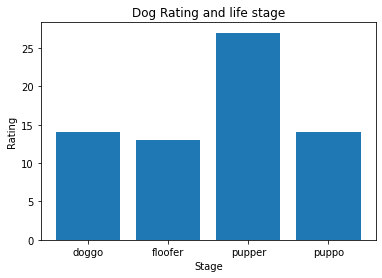

In [85]:
plt.bar(df4['life_stage'], df4['rating_numerator'])
plt.xlabel('Stage')
plt.ylabel('Rating')
plt.title('Dog Rating and life stage')

### Analyses

Dogs in the pupper life stage received higher ratings than dogs in the other life stages

### Visualisation 2
Scatter plot to determine rating of dog and dog breed

Text(0.5, 1.0, 'Relationship between favourite count and retweet count')

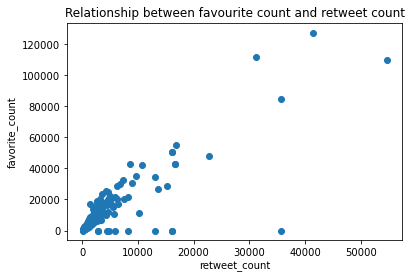

In [86]:
plt.scatter(df4['retweet_count'], df4['favorite_count'])
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')
plt.title('Relationship between favourite count and retweet count')

### Analyses
It appears that the is a relationship between the retweet_count and the favourite_count.  the higher the favourite count the higher the retweet_count as well

### Visualisation 3

Determine the rating and source of twitter use

Text(0.5, 1.0, 'Relationship between twitter platform and rating')

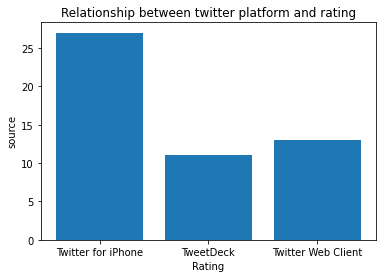

In [87]:

plt.bar(df4['source'], df4['rating_numerator'])
plt.xlabel('Rating')
plt.ylabel('source')
plt.title('Relationship between twitter platform and rating')

### Analysis

Twitter for iphone seems to be the most popular platform for @weratedogs followers